#Análise das vendas e resgates do Tesouro Direto (2002-2022)

O objetivo do trabalho é entender o desempenho dos produtos do Tesouro Direto durante os últimos 20 anos. Através disso, utilizaremos duas bases de dados disponibilizadas pelo Tesouro Nacional Transparente, ambiente online do Governo Federal que trazem diversas informações do cenário brasileiro em investimentos de renda fixa.

Link: https://www.tesourotransparente.gov.br/ckan/dataset/vendas-do-tesouro-direto

## Importando bibliotecas e bases

In [1]:
!pip install --pre pycaret


In [2]:
import multiprocessing

def worker_function(x):
    print(f"Worker function running with argument {x}.")

if __name__ == "__main__":
    # Defina o número desejado de CPUs a serem usadas
    num_cpus = 5  # Altere para o número desejado de CPUs

    # Crie uma pool de processos com o número especificado de CPUs
    with multiprocessing.Pool(processes=num_cpus) as pool:
        # Execute a função do trabalhador em paralelo com uma lista de argumentos
        pool.map(worker_function, range(10))

Worker function running with argument 1.Worker function running with argument 2.

Worker function running with argument 6.
Worker function running with argument 7.
Worker function running with argument 8.
Worker function running with argument 4.Worker function running with argument 3.Worker function running with argument 0.Worker function running with argument 5.Worker function running with argument 9.






In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!wget https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv

--2024-02-04 19:43:49--  https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv
Resolving www.tesourotransparente.gov.br (www.tesourotransparente.gov.br)... 189.9.50.33
Connecting to www.tesourotransparente.gov.br (www.tesourotransparente.gov.br)|189.9.50.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5811711 (5.5M) [text/csv]
Saving to: ‘VendasTesouroDireto.csv’

VendasTesouroDireto 100%[===================>]   5.54M   511KB/s    in 15s     

2024-02-04 19:44:05 (382 KB/s) - ‘VendasTesouroDireto.csv’ saved [5811711/5811711]



In [5]:
VendasTesouro = pd.read_csv('VendasTesouroDireto.csv', encoding='latin1', sep=';')

In [6]:
VendasTesouro.head(15)

,Tipo Titulo,Vencimento do Titulo,Data Venda,PU,Quantidade,Valor
0,Tesouro Selic,01/03/2025,06/11/2019,"10388,192179","3301,55","34297135,88"
1,Tesouro Prefixado com Juros Semestrais,01/01/2029,06/11/2019,"1276,208727","4823,51","6155805,55"
2,Tesouro IPCA+,15/05/2045,06/11/2019,"1559,303859","9629,35","15015082,61"
3,Tesouro Selic,01/03/2025,07/11/2019,"10390,172423","3288,01","34162990,82"
4,Tesouro IPCA+,15/05/2035,07/11/2019,"2067,354216","4719,26","9756382,05"
5,Tesouro IPCA+,15/05/2045,07/11/2019,"1547,385860","6026,89","9325924,36"
6,Tesouro IPCA+,15/08/2024,07/11/2019,"2934,067282","2556,40","7500649,59"
7,Tesouro Prefixado com Juros Semestrais,01/01/2029,07/11/2019,"1271,657021","5643,03","7175998,71"
8,Tesouro IPCA+ com Juros Semestrais,15/08/2050,07/11/2019,"5008,814693","14701,81","73638641,94"
9,Tesouro IPCA+ com Juros Semestrais,15/08/2026,07/11/2019,"4008,548765","489,08","1960501,02"


## Análise exploratória dos dados

Verificamos, aqui, quais informações estão disponíveis nessas bases e como elas se comportam.

In [7]:
print(VendasTesouro.columns.tolist())

['Tipo Titulo', 'Vencimento do Titulo', 'Data Venda', 'PU', 'Quantidade', 'Valor']


In [9]:
VendasTesouro.shape

(76919, 6)

In [10]:
VendasTesouro.nunique()

Tipo Titulo                 8
Vencimento do Titulo      126
Data Venda               5460
PU                      76468
Quantidade              38009
Valor                   76857
dtype: int64

In [11]:
VendasTesouro.dtypes

Tipo Titulo             object
Vencimento do Titulo    object
Data Venda              object
PU                      object
Quantidade              object
Valor                   object
dtype: object

In [12]:
VendasTesouro.isnull().sum()

Tipo Titulo             0
Vencimento do Titulo    0
Data Venda              0
PU                      0
Quantidade              0
Valor                   0
dtype: int64

In [13]:
# Convert 'Data Venda' column to datetime format
VendasTesouro['Data Venda'] = pd.to_datetime(VendasTesouro['Data Venda'], format='%d/%m/%Y')

# Retirar valores de 2024
VendasTesouro = VendasTesouro[VendasTesouro['Data Venda'].dt.year != 2024]

In [14]:
# prompt: transform the values of 'Valor' column into a float

VendasTesouro['Valor'] = VendasTesouro['Valor'].str.replace('.', '').str.replace(',', '.').astype(float)


<ipython-input-14-b4c5c64a1281>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  VendasTesouro['Valor'] = VendasTesouro['Valor'].str.replace('.', '').str.replace(',', '.').astype(float)


In [15]:
VendasTesouro.shape

(76079, 6)

In [16]:
VendasTesouro.dtypes

Tipo Titulo                     object
Vencimento do Titulo            object
Data Venda              datetime64[ns]
PU                              object
Quantidade                      object
Valor                          float64
dtype: object

In [17]:
VendasTesouro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76079 entries, 0 to 76918
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tipo Titulo           76079 non-null  object        
 1   Vencimento do Titulo  76079 non-null  object        
 2   Data Venda            76079 non-null  datetime64[ns]
 3   PU                    76079 non-null  object        
 4   Quantidade            76079 non-null  object        
 5   Valor                 76079 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 4.1+ MB


In [18]:
VendasTesouro.head(10)

,Tipo Titulo,Vencimento do Titulo,Data Venda,PU,Quantidade,Valor
0,Tesouro Selic,01/03/2025,2019-11-06,"10388,192179","3301,55",34297135.88
1,Tesouro Prefixado com Juros Semestrais,01/01/2029,2019-11-06,"1276,208727","4823,51",6155805.55
2,Tesouro IPCA+,15/05/2045,2019-11-06,"1559,303859","9629,35",15015082.61
3,Tesouro Selic,01/03/2025,2019-11-07,"10390,172423","3288,01",34162990.82
4,Tesouro IPCA+,15/05/2035,2019-11-07,"2067,354216","4719,26",9756382.05
5,Tesouro IPCA+,15/05/2045,2019-11-07,"1547,385860","6026,89",9325924.36
6,Tesouro IPCA+,15/08/2024,2019-11-07,"2934,067282","2556,40",7500649.59
7,Tesouro Prefixado com Juros Semestrais,01/01/2029,2019-11-07,"1271,657021","5643,03",7175998.71
8,Tesouro IPCA+ com Juros Semestrais,15/08/2050,2019-11-07,"5008,814693","14701,81",73638641.94
9,Tesouro IPCA+ com Juros Semestrais,15/08/2026,2019-11-07,"4008,548765","489,08",1960501.02


In [19]:
# prompt: drop the columns 'Vencimento do Titulo', 'PU' and 'Quantidade'

VendasTesouro = VendasTesouro.drop(['Vencimento do Titulo', 'PU', 'Quantidade'], axis=1)


In [21]:
VendasTesouro.head(10)

,Tipo Titulo,Data Venda,Valor
0,Tesouro Selic,2019-11-06,34297135.88
1,Tesouro Prefixado com Juros Semestrais,2019-11-06,6155805.55
2,Tesouro IPCA+,2019-11-06,15015082.61
3,Tesouro Selic,2019-11-07,34162990.82
4,Tesouro IPCA+,2019-11-07,9756382.05
5,Tesouro IPCA+,2019-11-07,9325924.36
6,Tesouro IPCA+,2019-11-07,7500649.59
7,Tesouro Prefixado com Juros Semestrais,2019-11-07,7175998.71
8,Tesouro IPCA+ com Juros Semestrais,2019-11-07,73638641.94
9,Tesouro IPCA+ com Juros Semestrais,2019-11-07,1960501.02


In [22]:
# Total em compras de títulos de Tesouro Direto (2002 - 2023)

print(VendasTesouro['Valor'].sum())

272046411821.31998


R$ 272.046.411.821,32 reais -
272 bilhões de reais comprados em títulos do Tesouro Direto (2002-2023)

In [23]:
# Número de vendas de Tesouro Direto realizada por ano (2002 - 2023)

data_venda_year = VendasTesouro.groupby(pd.to_datetime(VendasTesouro['Data Venda']).dt.year)['Data Venda'].count()
print(data_venda_year)


Data Venda
2002    1812
2003    3138
2004    3946
2005    4195
2006    5209
2007    5870
2008    5970
2009    4006
2010    3879
2011    4078
2012    2991
2013    2449
2014    2391
2015    2420
2016    2441
2017    2420
2018    2418
2019    2449
2020    2460
2021    2671
2022    2719
2023    6147
Name: Data Venda, dtype: int64


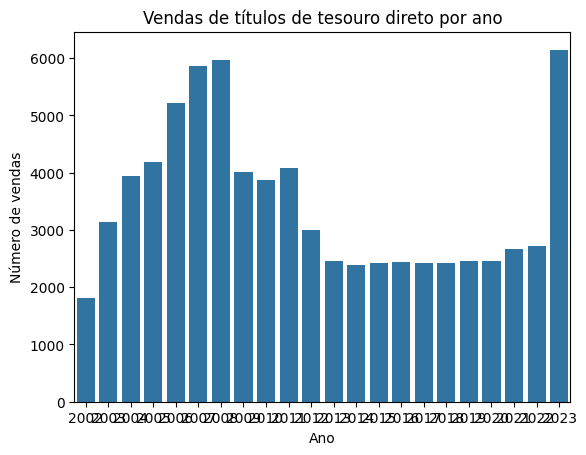

In [24]:
# Representação gráfica - número de vendas de Tesouro Direto realizada por ano (2002 - 2023)

sns.countplot(x=pd.to_datetime(VendasTesouro['Data Venda']).dt.year, data=VendasTesouro)

plt.xlabel('Ano')
plt.ylabel('Número de vendas')
plt.title('Vendas de títulos de tesouro direto por ano')
plt.show()


In [25]:
# Total de vendas por tipo de título do Tesouro Direto (2002 - 2023)

print(VendasTesouro['Tipo Titulo'].value_counts())

Tesouro IPCA+ com Juros Semestrais        21538
Tesouro Prefixado                         16081
Tesouro IPCA+                             12484
Tesouro Selic                              9145
Tesouro Prefixado com Juros Semestrais     8903
Tesouro IGPM+ com Juros Semestrais         4480
Tesouro RendA+                             1816
Tesouro Educa+                             1632
Name: Tipo Titulo, dtype: int64


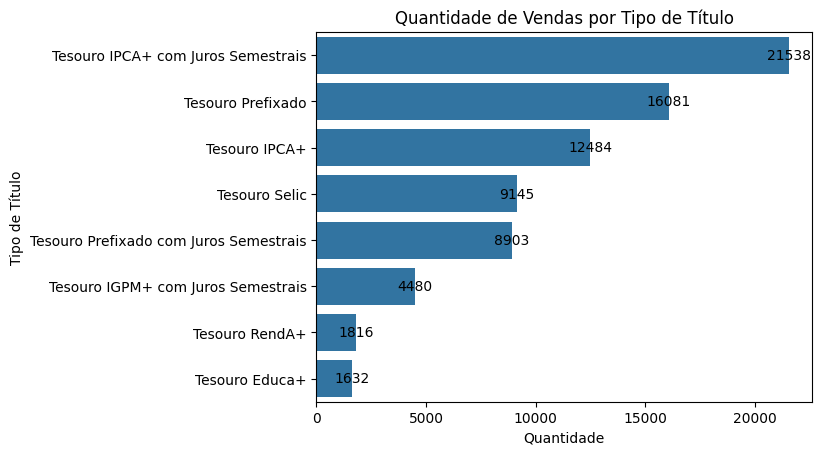

In [26]:
# Vendas por tipo de título

sns.barplot(x = VendasTesouro['Tipo Titulo'].value_counts().values, y = VendasTesouro['Tipo Titulo'].value_counts().index, orient='h')
for i, value in enumerate(VendasTesouro['Tipo Titulo'].value_counts().values):
    plt.text(value, i, str(value), ha='center', va='center', fontsize=10, color='black')

plt.xlabel('Quantidade')
plt.ylabel('Tipo de Título')
plt.title('Quantidade de Vendas por Tipo de Título')
plt.show()

In [27]:
# R$ vendidos em Tesouro direto anual (milhões)
valor_anual = VendasTesouro.groupby(pd.to_datetime(VendasTesouro['Data Venda']).dt.year)['Valor'].sum() / 1000000
print(valor_anual)


Data Venda
2002       75.709726
2003      249.312693
2004      358.018067
2005      657.041109
2006      765.633034
2007      767.600212
2008     1558.319963
2009     1562.561810
2010     2235.620313
2011     3539.573279
2012     3660.041986
2013     3678.076039
2014     4991.181330
2015    14456.521268
2016    19039.078921
2017    19383.599546
2018    17945.776210
2019    30882.608434
2020    24614.738799
2021    32583.363274
2022    42417.504768
2023    46624.531040
Name: Valor, dtype: float64


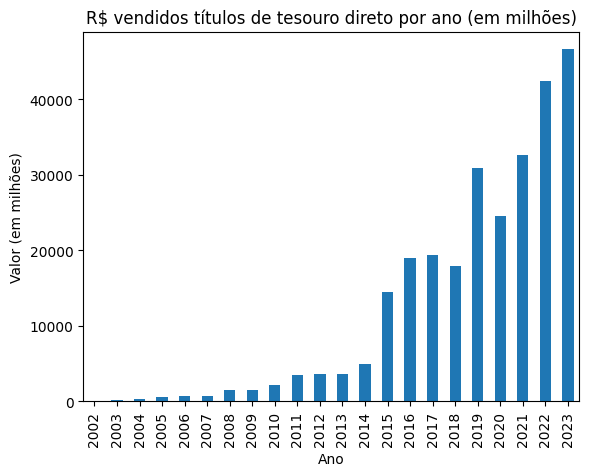

In [28]:
# Representação gráfica - R$ vendidos em Tesouro direto anual (milhões)

vendas_por_ano = VendasTesouro.groupby(pd.to_datetime(VendasTesouro['Data Venda']).dt.year)['Valor'].sum() / 1000000
vendas_por_ano.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Valor (em milhões)')
plt.title('R$ vendidos títulos de tesouro direto por ano (em milhões)')
plt.show()


# Projeção de vendas anuais

In [29]:
# Criar um dataframe com index (Data e Vendas Mensais) para conectar com o algoritmo de séries temporais

VendasTesouroMensal = VendasTesouro
VendasTesouroMensal = VendasTesouroMensal.groupby(pd.to_datetime(VendasTesouro['Data Venda']).dt.to_period('M'))['Valor'].sum().reset_index()
VendasTesouroMensal.rename(columns={'Data Venda': 'Data', 'Valor': 'Vendas mensais'}, inplace=True)
VendasTesouroMensal


,Data,Vendas mensais
0,2002-01,4.628261e+06
1,2002-02,7.682096e+06
2,2002-03,5.545423e+06
3,2002-04,4.148207e+06
4,2002-05,3.184792e+06
...,...,...
259,2023-08,3.659192e+09
260,2023-09,3.198765e+09
261,2023-10,3.325879e+09
262,2023-11,2.880270e+09


In [30]:
VendasTesouroMensal.head(10)

,Data,Vendas mensais
0,2002-01,4628260.60
1,2002-02,7682095.61
2,2002-03,5545422.66
3,2002-04,4148207.02
4,2002-05,3184791.96
5,2002-06,2788000.79
6,2002-07,3766284.60
7,2002-08,4753165.13
8,2002-09,6282072.74
9,2002-10,10379473.93


In [31]:
VendasTesouroMensal.head(15)

,Data,Vendas mensais
0,2002-01,4628260.60
1,2002-02,7682095.61
2,2002-03,5545422.66
3,2002-04,4148207.02
4,2002-05,3184791.96
5,2002-06,2788000.79
6,2002-07,3766284.60
7,2002-08,4753165.13
8,2002-09,6282072.74
9,2002-10,10379473.93


In [32]:
from pycaret.time_series import *
s = setup (VendasTesouroMensal['Vendas mensais'], fold = 5, fh = 36, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Vendas mensais
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(264, 1)"
5,Transformed data shape,"(264, 1)"
6,Transformed train set shape,"(228, 1)"
7,Transformed test set shape,"(36, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [33]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,264.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,1030478832.656515
3,Summary,Statistics,Transformed,Median,,308894810.115
4,Summary,Statistics,Transformed,Standard Deviation,,1267130303.362541
5,Summary,Statistics,Transformed,Variance,,1605619205699644416.0
6,Summary,Statistics,Transformed,Kurtosis,,1.743342
7,Summary,Statistics,Transformed,Skewness,,1.407644
8,Summary,Statistics,Transformed,# Distinct Values,,264.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",3541.994929


In [34]:
plot_model(plot = 'train_test_split')

In [35]:
plot_model (plot = 'diagnostics')

In [36]:
plot_model (plot = 'acf')

##Compare models

In [60]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,2.4731,2.3007,376331355.6282,479592029.3731,0.3733,0.4663,-1.2342,3.1720
stlf,STLF,2.4736,2.3421,349239970.9637,442468583.1783,0.4146,0.5552,-1.4409,0.0980
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,2.4999,2.2750,399878428.5006,495670306.3298,0.3939,0.4763,-1.1843,3.4540
arima,ARIMA,2.5524,2.4296,380650365.0434,483970165.4250,0.3929,0.5342,-1.5786,0.4980
polytrend,Polynomial Trend Forecaster,2.5577,2.3577,401583695.4849,502890430.6619,0.3823,0.4872,-1.3528,0.0300
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,2.5696,2.3432,408618006.4248,505225963.7744,0.4001,0.4950,-1.3226,4.8640
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,2.5844,2.3251,426038494.8333,514685231.6350,0.4709,0.5293,-1.3314,3.7860
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,2.5937,2.3668,408491310.5382,506451552.8535,0.4115,0.5071,-1.3796,2.9460
naive,Naive Forecaster,2.5973,2.3454,430036097.5933,522136257.9707,0.4179,0.5089,-1.3453,1.0600
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,2.6109,2.3800,426111205.6691,520028233.7939,0.4014,0.5087,-1.3993,3.1600


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

##Light Gradient Boosting w/ CDD

In [61]:
best

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [46, 45,
                                                                        44, 43,
                                                                        42, 41,
                                                                        40, 39,
                                                                        38, 37,
                                                                        36, 35,
                                                                        34, 33,
                                                                        32, 31,
                                                                        30, 29,
                                                                        28, 27,
                                                                        26, 25,
                                                                        24, 23,
                                                                        22, 21,
                                                                        20, 19,
                                                                        18, 17, ...]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(n_jobs=-1, random_state=123), sp=46,
                    window_length=46)

In [62]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [63]:
predict_best = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,1.5918,1.3406,784614687.6185,1067269818.4473,0.2096,0.2471,-0.5914


In [64]:
plot_model(best, plot = 'train_test_split')

In [65]:
plot_model(best, plot = 'diagnostics')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.
In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [66]:
plot_model(best, plot = 'insample')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [67]:
predictBest = predict_model(best, fh = 36)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,1.5918,1.3406,784614687.6185,1067269818.4473,0.2096,0.2471,-0.5914


In [68]:
finalizeBest = finalize_model(best)

In [69]:
saveBest = save_model(best, 'LGBMRegressor')
print(saveBest)

Transformation Pipeline and Model Successfully Saved
(ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [46,
                                                                                                                                        45,
                                                                                                                                        44,
                                                                                                                                        43,
                                                                                                                                        42,
                                                                                                                                   

In [70]:
loadBest = load_model('LGBMRegressor')
print(loadBest)

Transformation Pipeline and Model Successfully Loaded
ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [46,
                                                                                                                                        45,
                                                                                                                                        44,
                                                                                                                                        43,
                                                                                                                                        42,
                                                                                                                                   

##Naive Forecaster

In [71]:
# Previsão com o modelo 'Naive Forecaster'

Naive = create_model ('naive')


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,47.0000,0.6329,0.8310,34904304.2736,48209434.3364,0.4421,0.3958,-0.0110
1,83.0000,1.1145,1.1766,71088182.3358,90091127.8005,0.3336,0.3600,-0.2961
2,119.0000,0.9183,0.9759,93441336.2961,122663888.0881,0.2623,0.2691,-0.0770
3,155.0000,7.8378,6.7812,1004639475.3472,1099897543.3546,0.6488,0.9849,-5.0346
4,191.0000,2.4830,1.9625,946107189.7136,1249819296.2742,0.4026,0.5348,-1.3076
Mean,nan,2.5973,2.3454,430036097.5933,522136257.9707,0.4179,0.5089,-1.3453
SD,nan,2.6964,2.2520,446041968.2364,535570445.4293,0.1308,0.2529,1.9027


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
plot_model(Naive, plot = 'forecast', data_kwargs = {'fh' : 36})

In [39]:
plot_model(Naive, plot = 'diagnostics')

In [40]:
plot_model(Naive, plot = 'insample')

In [41]:
plot_model(Naive, plot = 'train_test_split')

In [48]:
predictNaive = predict_model(Naive, fh = 36)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,3.0441,2.1594,1500410737.6003,1719204398.9037,0.4120,0.5375,-3.1293


In [58]:
finalizeNaive = finalize_model(Naive)

In [53]:
saveNaive = save_model(Naive, 'NaiveForecaster')
print(saveNaive)

(ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster())]))]), 'NaiveForecaster.pkl')


In [52]:
loadNaive = load_model('NaiveForecaster')
print(loadNaive)

Transformation Pipeline and Model Successfully Loaded
